<h1><font color = 'darkblue',size =25><center>BANK MARKETING CAMPAIGN</font></h1>

_Runa Veigas_<br>
<right>runaveigas@gmail.com</right><br>

<h2><font color = 'green'>Objective</font></h2>

The classification goal is to predict if the client will subscribe a term deposit (variable y).


<h1><font color = 'green'><CENTER>INPUT VARIABLES</font></h1>

### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
<br>8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
<br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
<br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [21]:
original = pd.read_csv('bank-full.csv',sep = ';')


<IPython.core.display.Javascript object>

In [196]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [197]:
df.shape

(45211, 17)

### Missing Values

In [6]:
def nullValues(df):
    numMissing = df.isnull().sum()
    percentMissing = (100 * numMissing)/len(df)
    concatValues = pd.concat([numMissing,percentMissing],axis = 1)
    
    #Renaming and Sorting the percentage of missing values in non ascending order
    missingRenamed = concatValues.rename(columns = {0:"Missing Values", 1: "Percentage of Missing"})
    missingRenamedSorted = missingRenamed[missingRenamed.iloc[:,1]!=0].sort_values(by = 'Percentage of Missing',ascending = False).round(1) 
    print("Bank Data has totally {} coloumns out of which {} coloumns have missing values.".format
          (df.shape[1],missingRenamedSorted.shape[0]))
    return missingRenamedSorted

In [8]:
missingValues = nullValues(df)

<IPython.core.display.Javascript object>

Bank Data has totally 17 coloumns out of which 0 coloumns have missing values.


#### Visual Representation:

<IPython.core.display.Javascript object>

<AxesSubplot:>

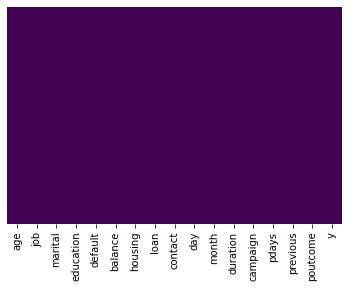

In [33]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

<h1><font color = 'green'><CENTER>OUTLIER DETECTTION AND REMOVAL</font></h1>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CAMPAIGN'}, xlabel='campaign'>

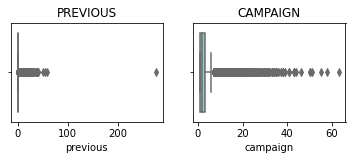

In [198]:



plt.subplot(2,2,3)
plt.title('PREVIOUS')
sns.boxplot(df['previous'],palette = 'Set3')

plt.subplot(2,2,4)
plt.title('CAMPAIGN')
sns.boxplot(df['campaign'],palette = 'Set3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PREVIOUS'}, xlabel='previous'>

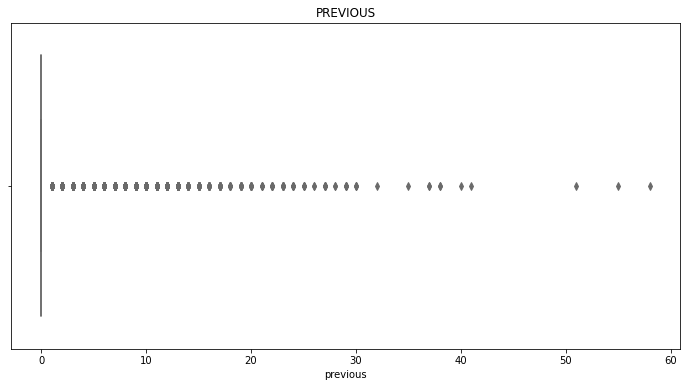

In [199]:
df = (df[df['previous']<100])
plt.figure(figsize = (12,6))
plt.title('PREVIOUS')
sns.boxplot(df['previous'],palette = 'Set3')

One data point was a extreme valaue as it was > 200. Thus I have dropped it.

### Outliers for Age

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'AGE'}, xlabel='age'>

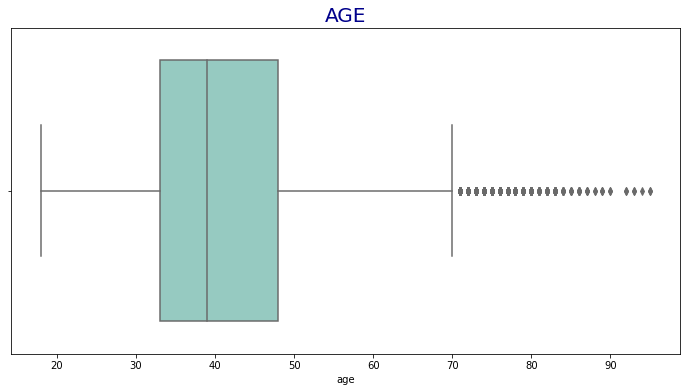

In [200]:

plt.figure(figsize = (12,6))
plt.title('AGE',fontsize =20,color = 'darkblue')
sns.boxplot(df['age'],palette = 'Set3')

In [201]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['age'])
print("Unique outliers from IQR method: ", set(sample_outliers))

print("Number of outliers from IQR method: ", len(sample_outliers))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unique outliers from IQR method:  {71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95}
Number of outliers from IQR method:  487


In [202]:
df.query('age > 70 & y=="yes"').count().head(1)

age    218
dtype: int64

__Conclusion__: However there are few clients(218) who are above the age of 70 and who have opted for the policy. But they cannot be considered as outliers as they can add add value to the camapaign. Thus these values will not be changed

## Outliers for Duration

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DURATION'}, xlabel='duration'>

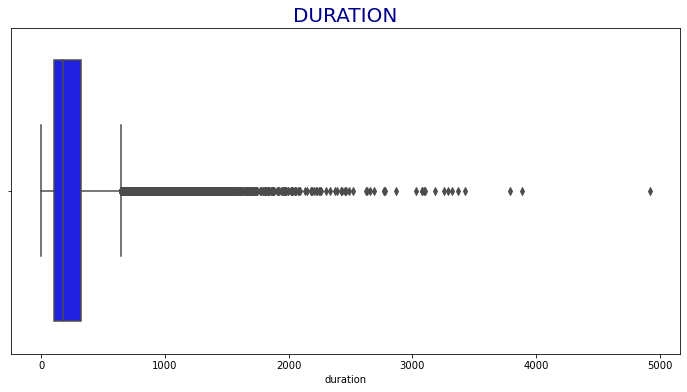

In [203]:
plt.figure(figsize = (12,6))
plt.title('DURATION',fontsize = 20,color = 'darkblue')
sns.boxplot(df['duration'],color = 'blue')

In [204]:
df.drop(df[df['duration'] > 1000].index,inplace = True)

The duration greater than 1000 have been dropped since the outliers will anyways be imputed with the median.

In [205]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
duration_outliers = detect_outliers_iqr(df['duration'])
#print("Unique outliers from IQR method: ", set(sample_outliers))

print("Outliers start from IQR method: ", min(duration_outliers))
print("Length of the outliers using IQR method: ", len(duration_outliers))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Outliers start from IQR method:  609
Length of the outliers using IQR method:  2614


_Idea_: Here the average duration taken for a client when the policy is subscribed as yes and as no will be used for imputation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-100.0, 1000.0)

<Figure size 864x432 with 0 Axes>

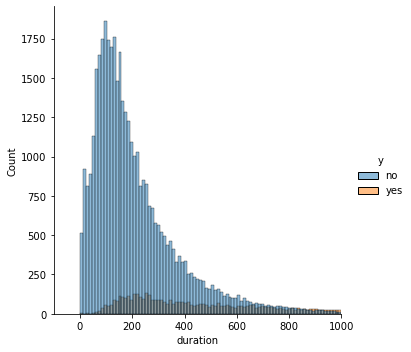

In [206]:
plt.figure(figsize = (12,6))
sns.displot(x = df['duration'],hue = df['y'])
plt.xlim(-100,1000)

Since duration is not normally distributed median will be taken for imputation

In [207]:
print('Average duration for Opting the policy', df[df['y'] == 'yes']['duration'].median())
print('Average duration for not Opting the policy', df[df['y'] == 'no']['duration'].median())

Average duration for Opting the policy 374.0
Average duration for not Opting the policy 162.0


In [208]:
median_y = df[df['y'] == 'yes']['duration'].median()
median_n = df[df['y'] == 'no']['duration'].median()

In [209]:
df['duration'] = np.where(((df['duration'] > 500) & (df['y'] == 'yes')) , median_y, df['duration'])
df['duration'] = np.where(((df['duration'] > 500) & (df['y'] == 'no')) , median_n, df['duration'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DURATION'}, xlabel='duration'>

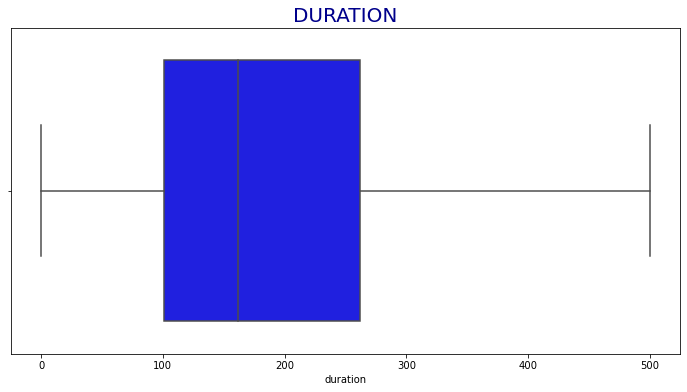

In [210]:
plt.figure(figsize = (12,6))
plt.title('DURATION',fontsize = 20,color = 'darkblue')
sns.boxplot(df['duration'],color = 'blue')

### Number of Duplicates

In [211]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


There are no duplicates in the data.

In [212]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Log Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([1.7197e+04, 1.2191e+04, 5.3560e+03, 5.1440e+03, 1.9810e+03,
        1.4570e+03, 5.0100e+02, 2.2800e+02, 8.7000e+01, 1.0000e+01]),
 array([0.        , 0.41431347, 0.82862695, 1.24294042, 1.65725389,
        2.07156736, 2.48588084, 2.90019431, 3.31450778, 3.72882125,
        4.14313473]),
 <BarContainer object of 10 artists>)

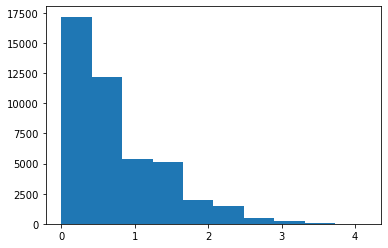

In [213]:
df['campaign'] = np.log(df['campaign'])

plt.hist(df['campaign'])

### Final Dataset

In [1]:
#df.to_csv('OutliersManaged.csv')

<h2><font color = 'green'><center>EXPLORATORY DATA ANALYSIS</center></font></h2>

In [32]:
df = pd.read_csv('OutliersManaged.csv')
df.drop('Unnamed: 0',axis = 1,inplace = True)
df['default'] = df['default'].astype(object)
df['housing'] = df['housing'].astype(object)
df['loan'] = df['loan'].astype(object)
df['housing'] = df['housing'].astype(object)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,0.0,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,0.0,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,0.0,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,0.0,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,0.0,-1,0,unknown,no


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age vs Subscription')

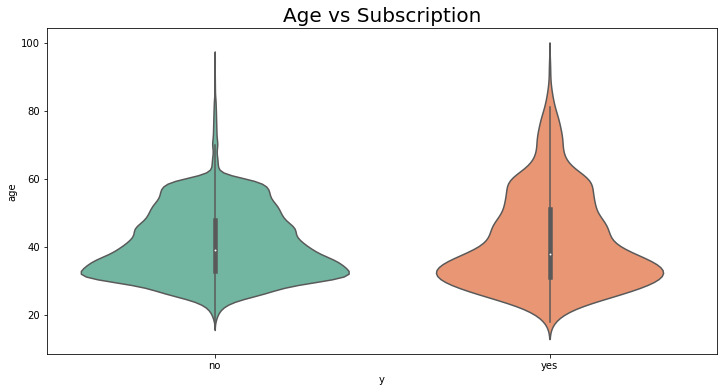

In [6]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="y",y="age",data=df,palette = 'Set2')
plt.title("Age vs Subscription", fontsize=20)

__Result__: Clients who buy the policy are more likely to fall between the age of 20-40. Also there are more number of clients beyond age of 60 who have bought the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Marital Status vs Subscription')

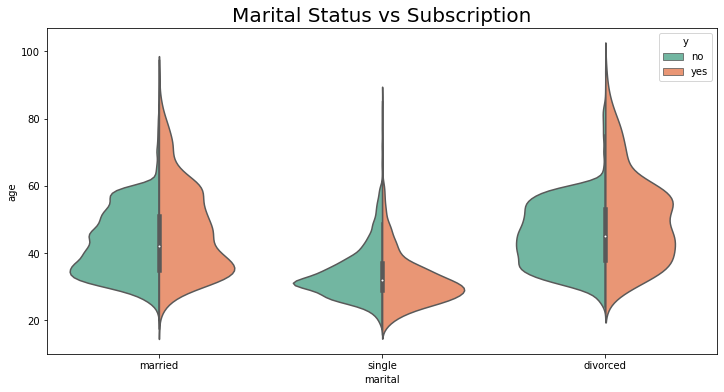

In [7]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="marital",y = 'age',hue = 'y',data=df,palette = 'Set2',split = True)
plt.title("Marital Status vs Subscription", fontsize=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Job vs Subscription according to Age')

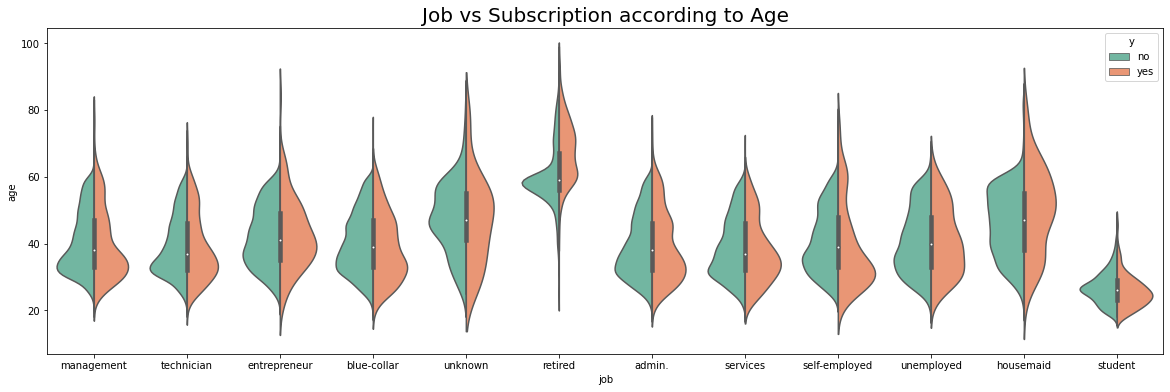

In [8]:
fig = plt.figure(figsize=(20,6))
sns.violinplot(x="job",y = 'age',hue = 'y',data=df,palette = 'Set2',split = True)
plt.title("Job vs Subscription according to Age", fontsize=20)

__Result__: Retired clients are more likelyt to buy the policy as ther is an approximate uniform distrmibution.

In [10]:
agg_job = df.groupby(['job', 'y'])['age'].count().unstack().fillna(0)
agg_job

y,no,yes
job,,
admin.,4512,561
blue-collar,8923,572
entrepreneur,1352,102
housemaid,1112,93
management,8058,1167
retired,1725,478
self-employed,1373,160
services,3745,308
student,665,258


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Job Type vs Subscription')

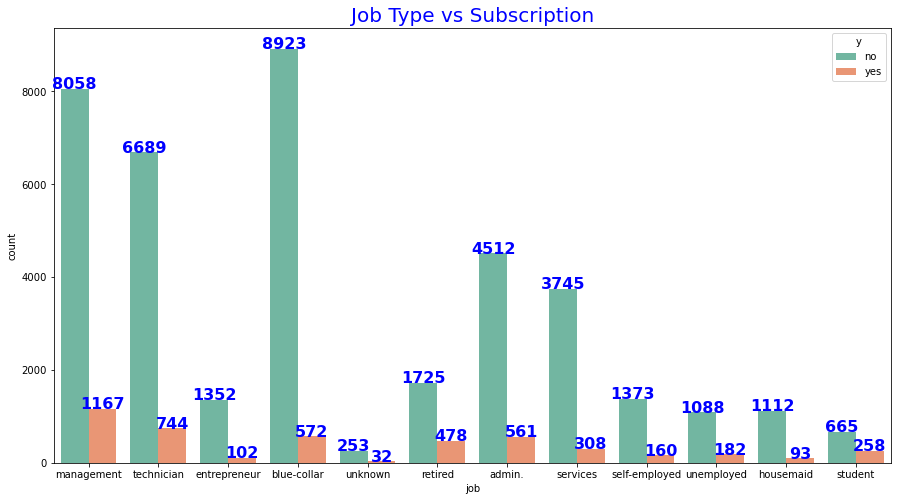

In [11]:
fig = plt.figure(figsize = (15,8))
b = sns.countplot(x = 'job',hue = 'y',data = df,palette = 'Set2')

b.set_xticklabels(b.get_xticklabels(),rotation=0)
for p in b.patches:
    height = p.get_height()
    b.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)

b.set_title('Job Type vs Subscription',fontsize = 20,color = 'b')

Clients who have their job description as management are more likely to opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Defaulters vs Subscription')

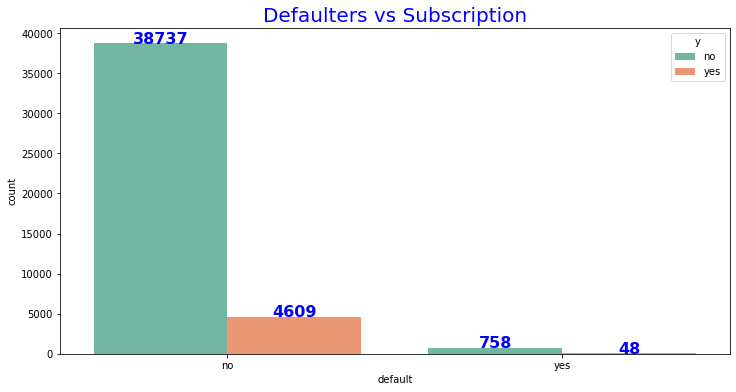

In [12]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'default',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Defaulters vs Subscription',fontsize = 20,color = 'b')

__Result__: Clients whose do not have default as their status are more likely to buy the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Housing vs Subscription')

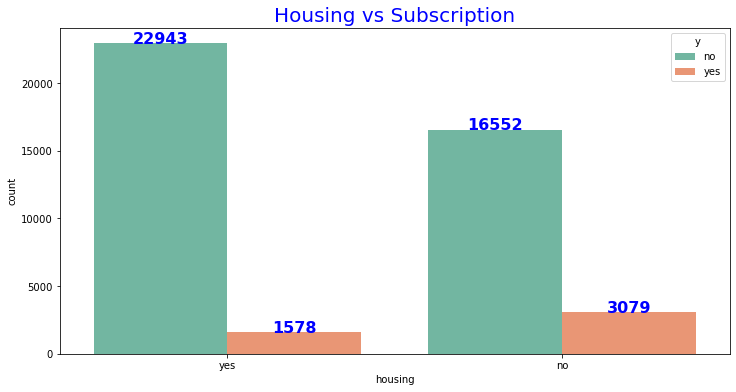

In [14]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'housing',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Housing vs Subscription',fontsize = 20,color = 'b')

__Result__: Irrespective of their housing loan status there is a small diffrence(26%) between clients who have and not have housing loan and yet apply for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Personal Loan vs Subscription')

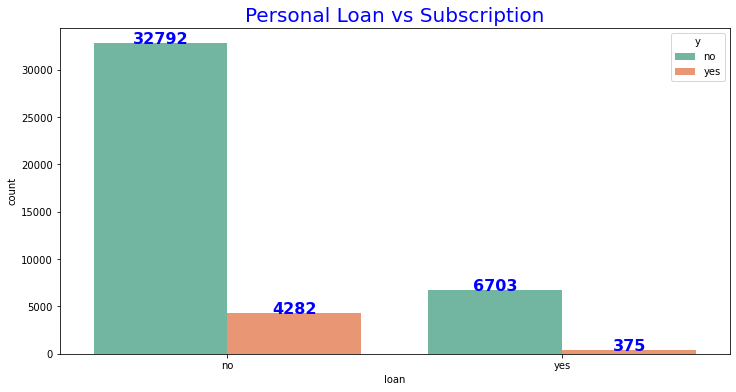

In [15]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'loan',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Personal Loan vs Subscription',fontsize = 20,color = 'b')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Education vs Subscription')

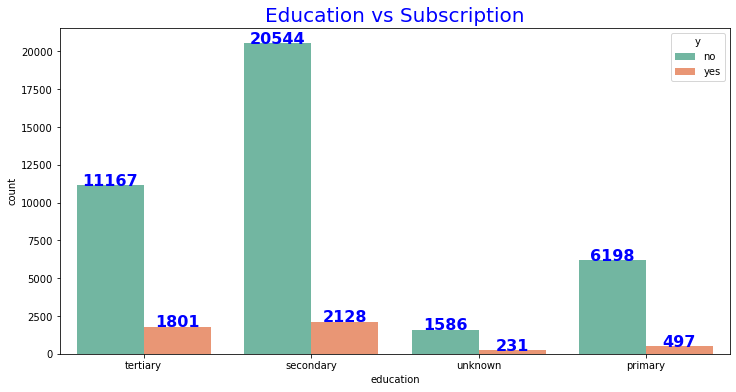

In [16]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'education',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Education vs Subscription',fontsize = 20,color = 'b')

__Result__: Clients with secondary and tertiary education are more likely to opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Contact vs Subscription')

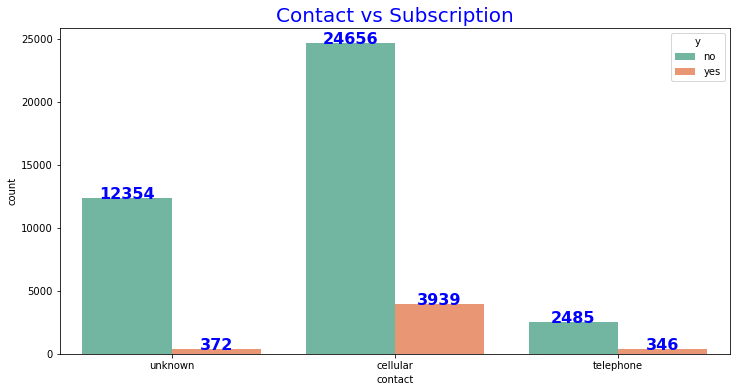

In [17]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'contact',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Contact vs Subscription',fontsize = 20,color = 'b')

__Result__: Cellular contact has a higher rate of subscription.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

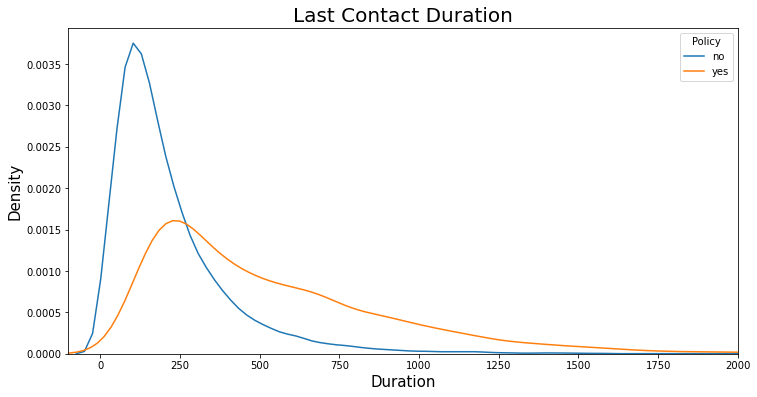

In [23]:
fig = plt.figure(figsize=(12,6))
sns.kdeplot(original.loc[original['y'] == 'no', 'duration'], label = 'no')
sns.kdeplot(original.loc[original['y'] == 'yes', 'duration'], label = 'yes');
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Last Contact Duration',fontsize=20);
plt.xlim(-100,2000)
plt.legend(title = 'Policy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of Contacts Performed before this Campaign and Subscription')

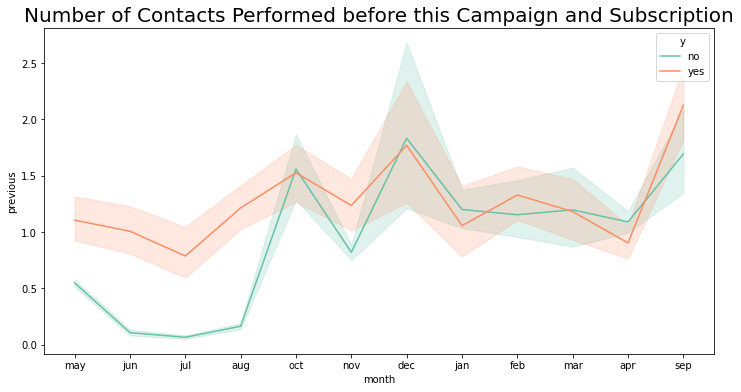

In [26]:
plt.figure(figsize = (12,6))
sns.lineplot(data = original, x = 'month',y = 'previous',hue = 'y',palette = 'Set2')
plt.title('Number of Contacts Performed before this Campaign and Subscription',fontsize = 20)

__Result__ : Clients are more likely to opt for policy from the month of May to October also in the month of September. Thus contact before the campaign brings more clients to opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of Contacts Performed before during the Campaign and Subscription')

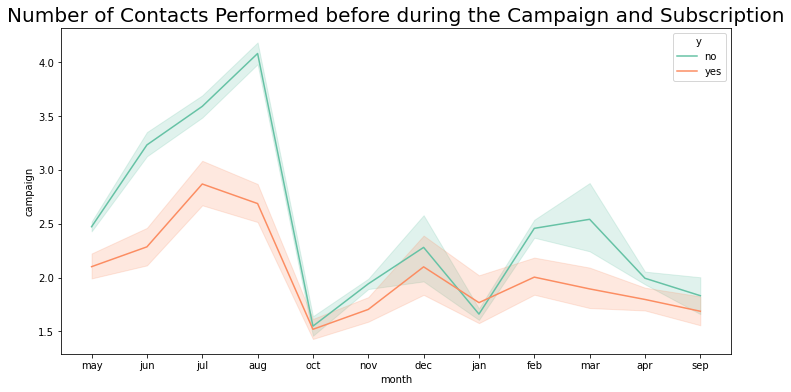

In [27]:
plt.figure(figsize = (12,6))
sns.lineplot(data = original, x = 'month',y = 'campaign',hue = 'y',palette = 'Set2')
plt.title('Number of Contacts Performed before during the Campaign and Subscription',fontsize = 20)

Positive subscription to the policy during the campaign does not outnumber the failure to subscription. However the month of december seems to be favourable for the outcome of our intrest.

<h1><font color = 'green'><CENTER>MODELING</font></h1>


For the final model LightGM model will be used since the accuracy was 90%. Data Imbalance is handeled using SMOTE technique.

In [29]:
from sklearn import preprocessing

In [33]:
count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count,'shape = ',df.shape)

default
housing
loan
y
4 columns were label encoded. shape =  (44152, 17)


In [34]:
df = pd.get_dummies(df)
print(df.shape)

<IPython.core.display.Javascript object>

(44152, 49)


Standardizing features by removing the mean and scaling to unit variance

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1),df['y'],test_size=0.15,random_state=101)

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [41]:
df['y'].value_counts()

0    39495
1     4657
Name: y, dtype: int64

Oversampling only the training set using Synthetic Minority Oversampling Technique (SMOTE)

In [42]:
from imblearn.over_sampling import SMOTE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

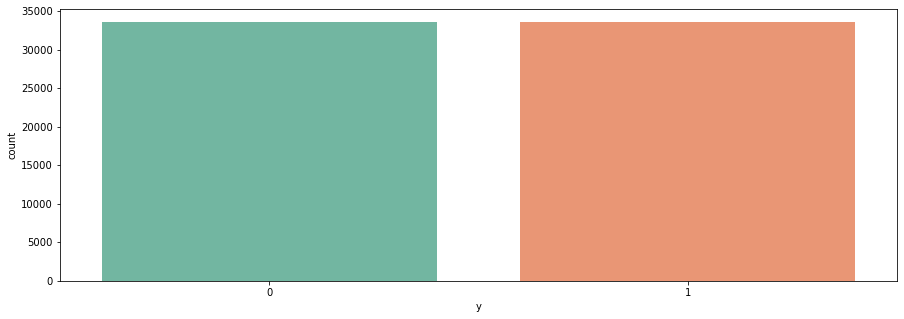

In [43]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

plt.figure(figsize = (15,5))
sns.countplot(y_train_r,palette = 'Set2')

Using LightGBM classifier (evalulation metric as AUC) along with Kfold cross validation.

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
import gc

In [55]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 

Function to use LightGBM with Kfold cross validation,

In [56]:
def kfold_lightgbm(train_df, num_folds, stratified = False):
    print("Starting LightGBM. Train shape: {}".format(train_df.shape))
    
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = np.zeros(train_df.shape[0])

    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['y']]
    
      # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['y'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['y'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['y'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
      # Fitting the model and evaluating by AUC
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
        print_score(clf, train_x, train_y, valid_x, valid_y, train=False)
        # Dataframe holding the different features and their importance
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        # Freeing up memory
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    display_importances(feature_importance_df)
    return feature_importance_df

Function for displaying the importance of the features,

In [57]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(15, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')

Starting LightGBM. Train shape: (44152, 49)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 200 rounds
[1000]	training's auc: 0.976452	training's binary_logloss: 0.114722	valid_1's auc: 0.962853	valid_1's binary_logloss: 0.140902
Early stopping, best iteration is:
[985]	training's auc: 0.976335	training's binary_logloss: 0.114935	valid_1's auc: 0.962894	valid_1's binary_logloss: 0.140848
Test Result:

accuracy score: 0.9420

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     13152
           1       0.79      0.61      0.69      1566

    accuracy                           0.94     14718
   macro avg       0.87      0.80      0.83     14718
weighted avg       0.94      0.94      0.94     14718


Confusion Matrix: 
 [[12902   250]
 [  604   962]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[637]	training's auc: 0.974131	training's binary_logloss: 0.120081	valid_1's auc: 0.958745	valid_1's binary_logloss: 0.145475
Test Result:

accuracy score: 0.9405

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     13147
           1       0.80      0.59      0.68      1570

    accuracy                           0.94     14717
   macro avg       0.87      0.79      0.82     14717
weighted avg       0.94      0.94      0.94     14717


Confusion Matrix: 
 [[12909   238]
 [  637   933]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 200 rounds
[1000]	training's auc: 0.974887	training's binary_logloss: 0.118525	valid_1's auc: 0.96391	valid_1's binary_logloss: 0.131849
Early stopping, best iteration is:
[855]	training's auc: 0.973558	training's binary_logloss: 0.121041	valid_1's auc: 0.964042	valid_1's binary_logloss: 0.131864
Test Result:

accuracy score: 0.9474

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     13196
           1       0.82      0.62      0.71      1521

    accuracy                           0.95     14717
   macro avg       0.89      0.80      0.84     14717
weighted avg       0.94      0.95      0.94     14717


Confusion Matrix: 
 [[12993   203]
 [  571   950]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

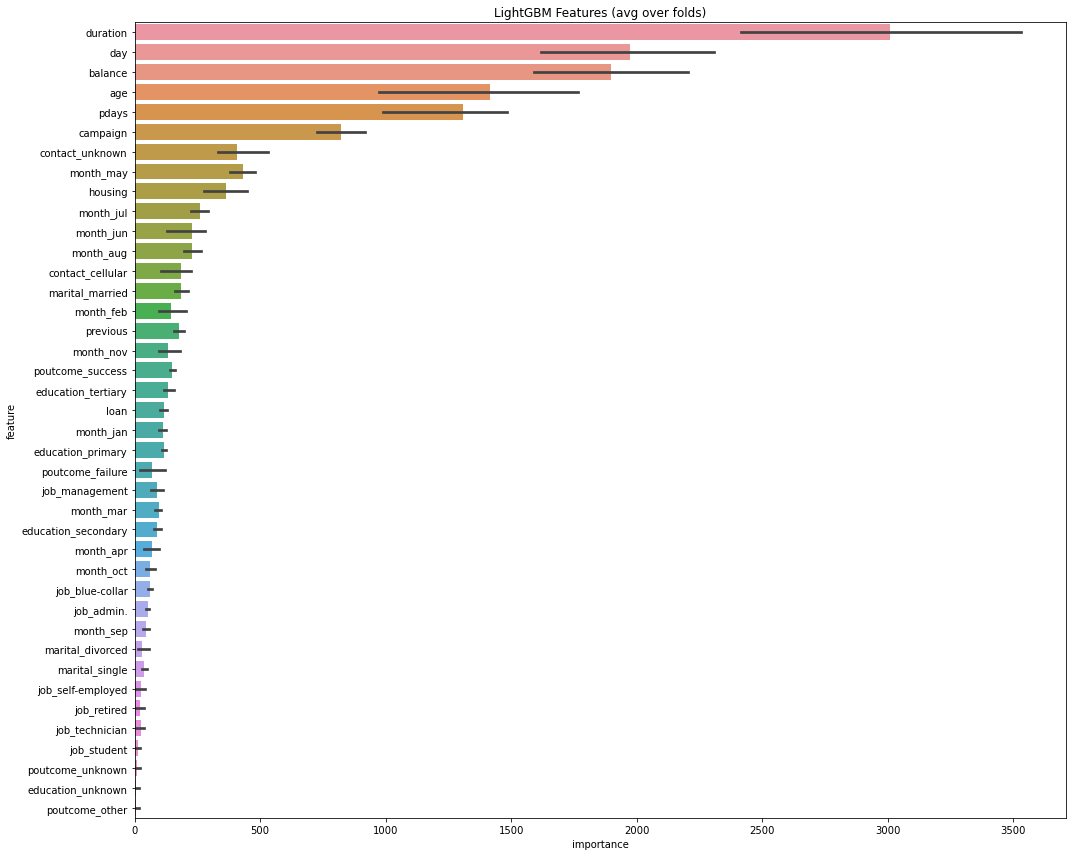

In [58]:
feat_importance = kfold_lightgbm(df, num_folds= 3, stratified= False)